In [146]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
import cv2
import os



In [147]:
img =image.load_img(r"C:\Users\adars\OneDrive\Desktop\basedata\train\adarsh\1.jpg")

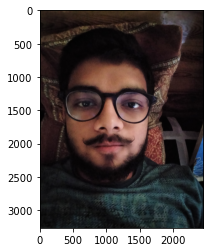

In [148]:
plt.imshow(img)

In [149]:
cv2.imread(r"C:\Users\adars\OneDrive\Desktop\basedata\train\adarsh\1.jpg")

array([[[30, 40, 50],
        [31, 41, 51],
        [31, 41, 51],
        ...,
        [21, 24, 29],
        [21, 25, 30],
        [21, 25, 30]],

       [[31, 41, 51],
        [31, 41, 51],
        [31, 41, 51],
        ...,
        [21, 24, 29],
        [21, 25, 30],
        [21, 25, 30]],

       [[31, 41, 51],
        [31, 41, 51],
        [31, 41, 51],
        ...,
        [21, 24, 29],
        [22, 25, 30],
        [22, 25, 30]],

       ...,

       [[25, 23, 22],
        [26, 24, 23],
        [27, 25, 24],
        ...,
        [12, 10, 10],
        [12, 10, 10],
        [12, 10, 10]],

       [[26, 24, 23],
        [26, 24, 23],
        [27, 25, 24],
        ...,
        [12, 10,  9],
        [12, 10,  9],
        [12, 10,  9]],

       [[26, 24, 23],
        [26, 24, 23],
        [27, 25, 24],
        ...,
        [12, 10,  9],
        [12, 10,  9],
        [12, 10,  9]]], dtype=uint8)

In [151]:
cv2.imread(r"C:\Users\adars\OneDrive\Desktop\basedata\train\adarsh\1.jpg").shape

(3264, 2448, 3)

In [152]:
train=ImageDataGenerator(rescale=1/550)
validation=ImageDataGenerator(rescale=1/550)

In [153]:
import ctypes
k32 = ctypes.windll.kernel32
wow64 = ctypes.c_long( 0 )
k32.Wow64DisableWow64FsRedirection( ctypes.byref(wow64) )
    # ... do stuff with real files ...
k32.Wow64RevertWow64FsRedirection( wow64 )

0

In [154]:
train_dataset=train.flow_from_directory(r'C:\Users\adars\OneDrive\Desktop\basedata\train/' ,
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode="binary")
validation_dataset=train.flow_from_directory(r'C:\Users\adars\OneDrive\Desktop\basedata\train/' ,
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode="binary")

Found 49 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [155]:
train_dataset.class_indices

{'adarsh': 0, 'mohit': 1}

In [156]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [157]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  
                                  tf.keras.layers.Dense(512,activation='softmax'),
    
])

In [158]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [159]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=10,
                   validation_data=validation_dataset)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\adars\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\adars\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\adars\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\adars\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\adars\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\adars\AppData\Roaming\Python\Python38\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\adars\AppData\Roaming\Python\Python38\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\adars\AppData\Roaming\Python\Python38\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\adars\AppData\Roaming\Python\Python38\site-packages\keras\losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\adars\AppData\Roaming\Python\Python38\site-packages\keras\backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 512) vs (None, 1)).


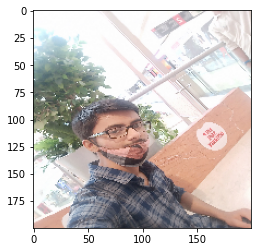

AttributeError: module 'keras.utils' has no attribute 'img_to_arrary'

In [139]:
dir_path=r'C:\Users\adars\OneDrive\Desktop\basedata\testing'

for i in os.listdir(dir_path ):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200) )
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_arrary(img)
    x=np.expand_dias(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    
    if val==0:
        print("adarsh")
    elif val==1:
        print("mohit")
    else:
        print("other")